# Xtreme Gradient Boosting

***
### `class init (trainData: Tensor<Float>, trainLabel: Tensor<Float>)`
#### OR
### `class init (trainDataPath: String) `


***

## Parameters:
  #### `trainData` : *Tensor`<Float>`*
  tensor of training data
  #### `trainLabel`: *Tensor`<Float>`*
  tensor of training label
  ##### OR
  #### `trainDataPath`: *String*
  path to libSVM/XGBoostBinary format data file


## Attributes: 
  #### `model`: PythonObject
  Fitted model

***

## Methods

***

  ### `boost(parameters: Dictionary<String, String>, iterations: Int)` :  Fit a XGBoost Model.
  ### parameters:
  #### `parameters`: Dictionary<String, String>
  Dictionary of paramters.
  #### `iterations`: Int, *optional* default: 10
  Number of rounds to be trained.

  ***

  ### `predict(testData: Tensor<Float>, testLabel: Tensor<Float>) -> Tensor<Float>` 
  
  #### OR
  
  ### `predict(testFile: String) -> Tensor<Float>`
  
  ### :: Get predictions from fitted model on test data.
      
  ### parameters:
  
  #### `testData`: [[String]]
  Tensor of test data.
  #### `testLabel`: [[String]]
  Tensor of test label.
  
  #### OR
  
  #### `testData`: [[String]]
  Path to libSVM/XGBoostBinary format test data file.
  
  ### Returns:
  Returns Tensor of predictions.  

  
***

# Example

# Import Commands

In [0]:
import TensorFlow
import swiftML

In [0]:
/// OR : To install the swiftML package from GitHub.

%install '.package(url: "https://github.com/param087/swiftML", from: "0.0.1")' swiftML

In [0]:
/// OR : To install the swiftML package that's in the local directory.

/// Path to the local directory
%install '.package(path: "/home/victora/GSOC19/github/swiftML")' swiftML

# Getting Dataset

You can either defined your own data set or import it

You need to do data pre-processing so that data is purely numerical


In [0]:
let X_train = Tensor<Float>([[-7.15602562e-02,  2.29553900e-01,  2.16543447e-01,  6.52739792e-02],
 [-4.03257104e-01,  2.00618406e+00,  2.02751248e+00, 8.50891944e-01],
 [-1.13058206e+00, -2.02959251e-02, -7.10233633e-01,-1.44099108e+00],
 [ 1.83324682e-01, -7.74610354e-01, -7.66054695e-01,-2.93668633e-01],
 [-2.86920000e-01, -7.16952984e-01, -9.86585088e-01,-8.48214735e-01],
 [-2.56042975e+00,  4.02232337e-01, -1.10074198e+00,-2.95958826e+00],
 [ 4.22341441e-01, -2.03911440e+00, -2.05321581e+00,-8.49123046e-01],
 [-5.09792713e-01,  4.92658944e-01,  2.48206729e-01,-3.09590732e-01],
 [ 7.21669496e-01, -1.12155664e+00, -8.31839865e-01, 1.50742097e-01],
 [-9.86132567e-01,  1.71053103e+00,  1.33828180e+00,-8.53410903e-02],
 [-7.23168038e-02, -7.73668334e-01, -9.20383253e-01,-6.15748704e-01],
 [ 4.55946498e-01, -4.57868762e-01, -2.41527100e-01, 2.65199620e-01],
 [ 3.93906076e-01,  3.90247346e-01,  6.81520677e-01, 7.61804328e-01],
 [ 2.03196825e+00,  8.40398655e-01,  2.18718140e+00, 3.13482383e+00],
 [ 4.58931008e-02, -2.61403392e-01, -2.68225264e-01,-1.19266118e-01],
 [ 3.73436160e-01, -1.07382634e+00, -9.89449288e-01,-2.56507783e-01],
 [-1.20114435e+00,  1.17241061e-01, -5.97321845e-01,-1.43683401e+00],
 [-1.30819171e+00, -4.32659559e-01, -1.28532883e+00,-1.94473774e+00],
 [ 5.56269743e-01, -5.84264226e-01, -3.23726922e-01, 3.06165066e-01],
 [-1.79506345e+00,  3.92904728e+00,  3.35973253e+00, 3.97369747e-01],
 [-1.30813451e+00,  1.51697242e+00,  9.23281451e-01,-6.23042516e-01],
 [-2.38076394e+00,  1.13712778e+00, -1.59027524e-01,-2.23460699e+00],
 [-4.86612462e-01, -1.92161720e+00, -2.47263494e+00,-1.91692582e+00],
 [ 4.32994532e-01,  2.20346371e-01,  5.12814562e-01, 6.95976074e-01],
 [ 1.26780440e+00, -1.80170793e+00, -1.27034986e+00, 3.79112828e-01],
 [ 1.10502647e+00, -1.94989387e+00, -1.53716448e+00, 7.31712082e-02],
 [ 1.34057624e+00, -8.14593363e-01, -1.07894567e-01, 1.14012761e+00],
 [-6.79598011e-01,  1.03943907e+00,  7.64389529e-01,-1.53297707e-01],
 [-1.82896522e-01, -1.01290187e+00, -1.25860859e+00,-9.17515596e-01],
 [ 1.10698637e+00, -1.06701573e+00, -5.35834091e-01, 6.74133734e-01],
 [ 5.44818813e-01, -1.33330476e+00, -1.17921312e+00,-2.16052537e-01],
 [ 1.55525060e+00,  2.56253272e-01,  1.23567148e+00, 2.13703895e+00],
 [-3.45538051e-01, -2.29672334e+00, -2.81180710e+00,-1.99311342e+00],
 [ 1.12073484e+00, -3.24744191e-01,  3.13380666e-01, 1.19466313e+00],
 [-9.07197428e-01,  3.87813199e-01, -1.12132974e-01,-8.82342712e-01],
 [ 1.87834887e+00,  5.77288519e-01,  1.79574591e+00, 2.76253865e+00],
 [ 1.43370121e+00, -1.75423984e+00, -1.11573423e+00, 6.20716743e-01],
 [ 3.80251566e-01,  2.02956697e+00,  2.53026908e+00, 1.85583449e+00],
 [-1.25732069e+00, -2.14861012e+00, -3.19826339e+00,-3.04373307e+00],
 [ 6.87661760e-01, -1.36592018e+00, -1.12933108e+00,-5.78388150e-02],
 [-1.10453952e+00,  2.10141172e+00,  1.70910242e+00, 3.01549448e-02],
 [-7.93470192e-01,  1.26662420e+00,  9.52529622e-01,-1.43043530e-01],
 [-1.24378126e+00,  2.80821112e-01, -4.37933163e-01,-1.37977014e+00],
 [ 4.17180364e-01, -1.16786115e+00, -1.06938289e+00,-2.65030274e-01],
 [-4.22761581e-01, -7.69213504e-01, -1.12836011e+00,-1.05512600e+00],
 [-2.47553402e-03,  3.99799271e-01,  4.51394467e-01, 2.67892177e-01],
 [ 4.86681188e-01, -1.54740567e+00, -1.45709006e+00,-4.34580195e-01],
 [-6.05415797e-01, -2.95970599e-01, -7.03291920e-01,-9.64902950e-01],
 [-1.66130052e+00,  2.39203665e+00,  1.69989125e+00,-4.75683472e-01],
 [-1.40246886e+00, -1.12856503e-01, -9.80358459e-01,-1.84696289e+00],
 [ 1.77624479e+00,  8.01478699e-01,  1.98764670e+00, 2.78561851e+00]])
let y_train = Tensor<Float>([1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,1,1,1,-1,1,1,1,-1,1,1,1,-1,
 1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,1])

let X_test = Tensor<Float>([[-3.58754622e+00,  2.91819358e-01,-1.85016853e+00,-4.33105451e+00],
 [-8.60699619e-01, -3.05605700e-01,-8.69385004e-01,-1.29370156e+00],
 [-2.52159550e+00,  2.47822554e+00, 1.27458364e+00,-1.50328320e+00],
 [-2.68051210e-01, -2.51082272e-01,-4.47369310e-01,-5.08589018e-01],
 [ 1.47049892e+00,  1.27779762e+00, 2.34137626e+00, 2.72253736e+00],
 [-1.62073375e+00, -1.09219355e+00,-2.22244349e+00,-2.78637404e+00],
 [ 9.29950318e-01, -1.28851463e+00,-8.94365876e-01, 3.00495195e-01],
 [-2.05721672e-01,  1.75895321e+00, 1.86752028e+00, 9.32664558e-01],
 [ 2.02899023e+00, -1.66963586e-01, 1.04421447e+00, 2.44819035e+00],
 [ 4.24345081e-01, -1.27805989e+00,-1.18986266e+00,-3.30687508e-01],
 [ 1.23195055e+00, -1.53949526e+00,-9.95105317e-01, 5.11600970e-01],
 [ 1.97698901e+00, -2.13264106e+00,-1.21414740e+00, 1.05004467e+00],
 [ 7.09216593e-01, -1.48173957e+00,-1.24743076e+00,-1.09140294e-01],
 [-9.61541555e-01,  1.60143468e+00, 1.22964368e+00,-1.28252298e-01],
 [ 2.63325914e+00,  1.99685828e+00, 3.86274219e+00, 4.67783070e+00],
 [-1.23267396e+00,  1.16556238e+00, 5.71068197e-01,-7.65997056e-01],
 [ 2.11564734e+00, -1.14241583e+00,-8.11815767e-03, 1.89634239e+00],
 [-1.62184212e+00,  1.71338067e+00, 9.55083877e-01,-8.85921252e-01],
 [ 1.79445113e+00, -1.76032840e+00,-9.03343950e-01, 1.07199564e+00],
 [-4.37843295e-02, -1.10110026e+00,-1.27395967e+00,-8.01690305e-01],
 [-1.04862023e-01,  2.77136027e-01, 2.50202269e-01, 5.54893707e-02],
 [ 1.78037474e+00, -1.74994864e+00,-9.00142145e-01, 1.06126205e+00],
 [ 3.51173413e-01, -9.78969116e-01,-8.95526209e-01,-2.20309869e-01],
 [ 5.59313196e-01,  2.94070232e-01, 6.73114962e-01, 9.05415370e-01],
 [-2.89788250e-01, -9.07110118e-01,-1.20374176e+00,-9.80739928e-01],
 [-8.27182474e-01,  1.52088679e+00, 1.22006997e+00,-1.32411247e-02],
 [-3.69743600e+00,  1.57688756e+00,-4.61220130e-01,-3.59865169e+00],
 [-8.64008129e-01, -7.95292811e-02,-6.15293010e-01,-1.14462475e+00],
 [-2.08311803e-01,  8.62484933e-01, 8.50411665e-01, 3.21693913e-01],
 [-1.00171129e-01,  2.17784212e+00, 2.40620516e+00, 1.34986807e+00],
 [ 1.85082392e+00, -1.68249922e+00,-7.80910684e-01, 1.19591905e+00],
 [ 7.33899962e-01, -5.14311992e-01,-1.36508549e-01, 5.77822712e-01],
 [-8.69536952e-01,  1.99896877e+00, 1.73590335e+00, 2.57374908e-01],
 [ 1.35329628e+00, -1.28744103e+00,-6.35812195e-01, 8.35649670e-01],
 [-8.00221059e-01, -1.73569497e-01,-6.83049356e-01,-1.12784904e+00],
 [ 2.42548085e+00, -5.49891548e-01, 8.51440362e-01, 2.68913472e+00],
 [ 1.26661394e+00, -1.66609892e+00,-1.11745336e+00, 4.69537098e-01],
 [-3.21105367e-01,  4.13288030e-01, 2.72990606e-01,-1.25198379e-01],
 [ 8.65825460e-01, -1.47849471e+00,-1.14855777e+00, 9.07604414e-02],
 [-7.62884416e-01, -8.71745826e-01,-1.45125944e+00,-1.55399781e+00],
 [-4.43584187e-01,  9.94282124e-01, 8.56699698e-01, 1.14032083e-01],
 [-2.20119016e+00,  2.86723955e+00, 1.91002859e+00,-8.35101353e-01],
 [ 1.83240861e+00, -1.91015444e+00,-1.04999632e+00, 1.01834812e+00],
 [-3.54528872e-01,  1.21218915e-01,-7.81871442e-02,-3.65380582e-01],
 [-1.97242756e+00,  1.52087608e+00, 5.23902618e-01,-1.45899162e+00],
 [-1.05286598e+00, -6.41515112e-01,-1.36672011e+00,-1.76399739e+00],
 [-4.71824167e-01,  4.44968329e-01, 2.17261785e-01,-2.93988382e-01],
 [-1.94643859e-01,  1.29688443e+00, 1.35081491e+00, 6.33420331e-01],
 [-3.59967304e-01, -1.05473721e+00,-1.41363563e+00,-1.16940705e+00]])

let y_test = Tensor<Float>([-1,-1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,1,-1,-1,
 1,-1,1,-1,-1,1,1,-1,1,1,-1,1,1,-1,1,-1,-1,1,1,-1,1,1,-1,1,1,-1])

# XGBoost 


### **XGBoost Initializer**

The initializer takes in the following arguments: 

*   trainData --> Tensor<Float> of training data
*   trainLable --> Tensor<Float> of labels


> OR


* . trainDataPath --> Train data file path in libSVM format or XGBoostBinary

### **XGBoost Predict**

The predict function takes in: 
*  testData: Tensor<Float>  of testing data
* testLabel: Tensor<Float> of labels

> OR


* testFile --> Test data file path in libSVM format or XGBoostBinary
  
it returns a Float array of predictions

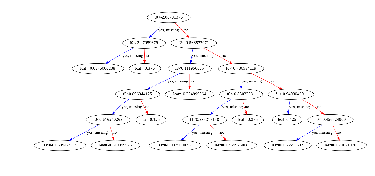

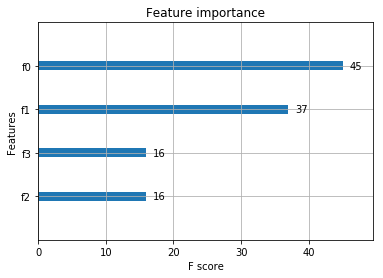

In [0]:
let Booster = XGBoost(trainData: X_train, trainLabel: y_train)
//define param in accordance to XGBoost documentations
let param : Dictionary<String, String> = ["max_depth": "5", "eta": "1", "nthread": "4"]

Booster.boost(parameters: param)
Booster.predict(testData: X_test, testLabel: y_test)

%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

Booster.plotTree()
Booster.plotImportance()

You can also train a model directly from a file in an appropriate format

In [0]:
let newBooster = XGBoost(trainDataPath: "heart_scale")
let parameters : Dictionary<String, String> = ["max_depth": "5", "eta": "1", "nthread": "4"]

newBooster.boost(parameters: parameters)
newBooster.saveModel(at: "./model.raw.txt")
newBooster.predict(testFile: "heart_test")